<a href="https://colab.research.google.com/github/Sindhura-tr/Machine-Learning-satsun-5-7/blob/main/Kmeans_Heirarchal_Clustering_5_7pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

## Evaluation metric for K-Means clustering => Inertia:
Sum of squared intra distances of respective cluster

Good model is the one which has lower inertia and lower number of clusters

# Hierarchal Clustering

## Linkages
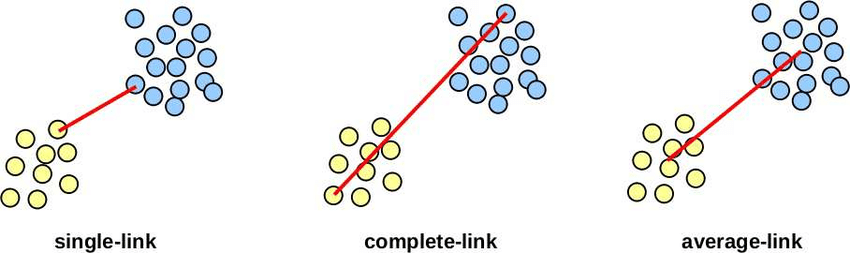

Single Linkages: calculate the minimum distance between datapoints of 2 clusters

Complete Linkages: calculate the maximum distance between datapoints of 2 clusters

Average Linkages: calculates the average distance of all datapoints between 2 clusters

Centroid Linkages: calculate the centroid distance between 2 clusters

## Evaluation metrics for Hierarchal clustering:

Silhoutte score: It is a measure which identifies how close the datapoint is, to its own cluster and  how far the datapoint if, from other cluster.

range of values: -1 to 1
higher the value/closer the value to 1 represents well matched datapoint to its own cluster.

lower the value/closer the value to -1 represents poor matched datapoint to its own cluster

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install plotly nbformat


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/14.8 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/14.8 MB 5.0 MB/s eta 0:00:03
   -------- ------------------------------- 3.1/14.8 MB 4.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.7/14.8 MB 4.1 MB/s eta 0:00:03
   ---------- ----------------------------- 3.9/14.8 MB 3.9 MB/s eta 0:00:03
   ---------- ----------------------------- 3.9/14.8 MB 3.9 MB/s eta 0:00:03
   ----------- ---------------------------- 4.2/14.8 MB 2.9 MB/s eta 0:00:04
   ------------ -----


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Business statement: Create customer groups based on age,income and spending

In [3]:
import pandas as pd
df = pd.read_csv(r'D:\Machine-Learning\repository\K_means_Hireachial_clastering\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## There are no missing values nor any duplicated data in this dataset

## Define X features => Age,Income,Spending

In [8]:
x = df.drop(columns=["CustomerID","Genre"])
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
x.columns= ["Age","Income","Score"]

In [10]:
x.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform='pandas')

In [13]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [14]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## K-Means model

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

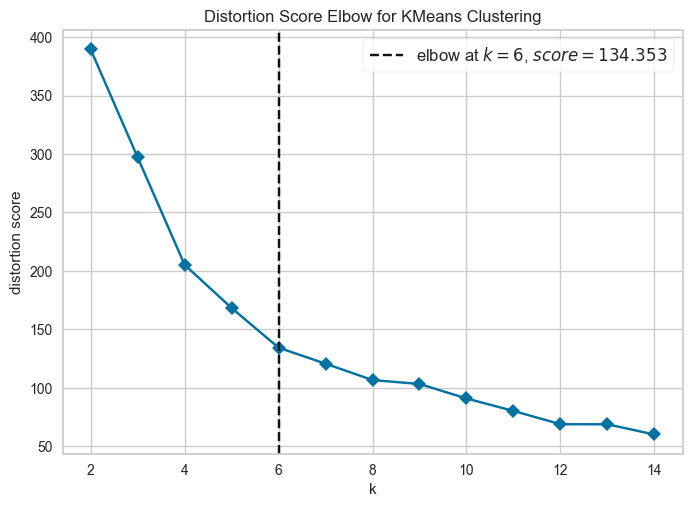

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,x_pre,k=(2,15),timings=False)
visualizer.show()

## From the above elbow graph, we can consider the optimal value of k as 6

In [17]:
best_model_kmeans = KMeans(n_clusters=6)
clusters= best_model_kmeans.fit_predict(x_pre)
clusters

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2,
       0, 2, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 2,
       5, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 2, 5, 5, 2, 5, 5, 2,
       2, 5, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 2, 5, 5, 5, 5,
       5, 2, 3, 2, 2, 2, 5, 5, 5, 5, 2, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [18]:
best_model_kmeans.cluster_centers_

array([[ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.41983513,  2.06703817,  1.0958772 ],
       [-0.98067852, -0.74305983,  0.46744035],
       [ 0.07333084,  0.97494509, -1.19729675],
       [-0.43070888,  0.74317035,  1.2415841 ],
       [ 1.20484056, -0.23577338, -0.05236781]])

In [19]:
x.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [20]:
x["cluster"] = clusters
x.head()

,Age,Income,Score,cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,2


In [21]:
x[x["cluster"]==0]

,Age,Income,Score,cluster
2,20,16,6,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0
22,46,25,5,0


In [22]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(x[x["cluster"]==i])

Details of cluster 0


,Age,Income,Score,cluster
2,20,16,6,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0
22,46,25,5,0


Details of cluster 1


,Age,Income,Score,cluster
187,28,101,68,1
189,36,103,85,1
191,32,103,69,1
193,38,113,91,1
195,35,120,79,1
197,32,126,74,1
199,30,137,83,1


Details of cluster 2


,Age,Income,Score,cluster
0,19,15,39,2
1,21,15,81,2
3,23,16,77,2
4,31,17,40,2
5,22,17,76,2
7,23,18,94,2
9,30,19,72,2
11,35,19,99,2
13,24,20,77,2
15,22,20,79,2


Details of cluster 3


,Age,Income,Score,cluster
112,38,64,42,3
121,38,67,40,3
124,23,70,29,3
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
132,25,72,34,3
134,20,73,5,3
136,44,73,7,3
138,19,74,10,3


Details of cluster 4


,Age,Income,Score,cluster
122,40,69,58,4
123,39,69,91,4
125,31,70,77,4
127,40,71,95,4
129,38,71,75,4
131,39,71,75,4
133,31,72,71,4
135,29,73,88,4
137,32,73,73,4
139,35,74,72,4


Details of cluster 5


,Age,Income,Score,cluster
40,65,38,35,5
46,50,40,55,5
50,49,42,52,5
53,59,43,60,5
54,50,43,45,5
55,47,43,41,5
56,51,44,50,5
57,69,44,46,5
59,53,46,46,5
60,70,46,56,5


In [23]:
best_model_kmeans.inertia_

158.0028760289015

In [24]:
centroids = x.groupby("cluster").mean(numeric_only=True)
centroids

,Age,Income,Score
cluster,,,
0,46.250000,26.750000,18.350000
1,33.000000,114.714286,78.428571
2,25.185185,41.092593,62.240741
3,39.871795,86.102564,19.358974
4,32.848485,80.030303,82.181818
5,55.638298,54.382979,48.851064


In [25]:
import plotly.express as px

In [26]:
fig = px.scatter_3d(data_frame=x,x="Age",y="Income",z="Score",color="cluster")
fig.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
base_model2 = AgglomerativeClustering()
base_model2.fit(x_pre)

AgglomerativeClustering()

In [28]:
lab = base_model2.labels_

In [29]:
lab

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [30]:
base_model3 = AgglomerativeClustering(n_clusters=3,linkage="ward")
base_model3.fit(x_pre)

AgglomerativeClustering(n_clusters=3)

In [31]:
lb2 = base_model3.labels_
lb2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [32]:
base_model4 = AgglomerativeClustering(n_clusters=3,linkage="complete")
base_model4.fit(x_pre)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [33]:
lb3 = base_model4.labels_
lb3

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(x_pre,lb2)

0.32148866683112387

In [36]:
silhouette_score(x_pre,lb3)

0.28384379984299635

In [37]:
n = list(range(2,15))
n

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [38]:
sil_scores = []
for i in n:
  # define the model
  model = AgglomerativeClustering(n_clusters=i)
  # fit the model
  model.fit(x_pre)
  # calculate labels and silhoutte score
  lb = model.labels_
  sil = silhouette_score(x_pre,lb)
  sil_scores.append(sil)
print(sil_scores)

[0.31795733680759597, 0.32148866683112387, 0.3614512741691407, 0.39002826186267214, 0.4201169558789579, 0.3982948069934959, 0.36647935858620484, 0.3753854624760521, 0.3808885873908944, 0.38119813515480855, 0.3535716262087456, 0.35579016289204674, 0.35322985543969]


## Plot silhoutte score graph

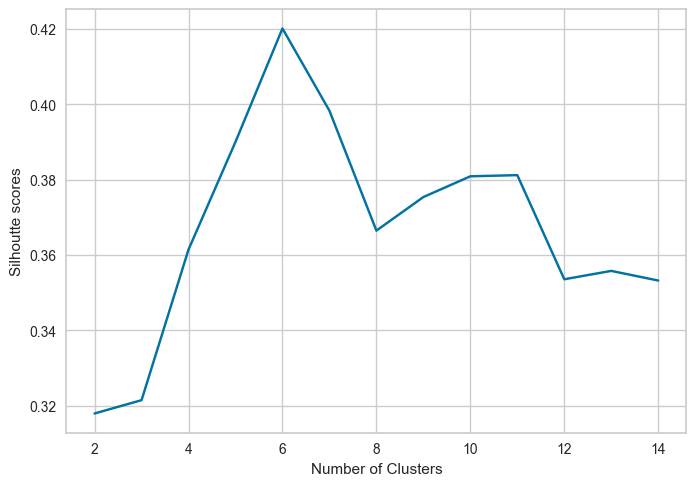

In [39]:
import matplotlib.pyplot as plt
plt.plot(n,sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte scores")
plt.show()

## Let's consider k=6 clusters for final model building

In [40]:
best_model_agg= AgglomerativeClustering(n_clusters=6)
best_model_agg.fit(x_pre)

AgglomerativeClustering(n_clusters=6)

In [41]:
labels = best_model_agg.labels_
labels

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [42]:
xnew = x.copy()
xnew

,Age,Income,Score,cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [43]:
xnew["cluster_agg"] = labels
xnew.head()

,Age,Income,Score,cluster,cluster_agg
0,19,15,39,2,4
1,21,15,81,2,5
2,20,16,6,0,4
3,23,16,77,2,5
4,31,17,40,2,4


In [44]:
x.to_csv("KMeans Cluster Results-1.csv",index=False)
xnew.to_csv("Hierarchal Cluster Results-1.csv",index=False)